In [2]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("The cifar database has a traing set of %d examples." %len(x_train))
print("The cifar database has a test set of %d examples." %len(x_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
The cifar database has a traing set of 50000 examples.
The cifar database has a test set of 10000 examples.


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
x_test[0].shape

(32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print("normalized x values: \n")
print(" x_train shape:", x_train.shape)
print("one-hot encoded y values: \n")
print(" x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

normalized x values: 

 x_train shape: (50000, 32, 32, 3)
one-hot encoded y values: 

 x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [8]:
x_train[0].min()

np.float32(0.0)

In [9]:
x_train[0].max()

np.float32(1.0)

In [10]:
x_train[0].shape==y_train[0].shape

False

In [11]:
y_train[0].min()

np.float64(0.0)

In [12]:
y_train[0].max()

np.float64(1.0)

In [13]:
import numpy as np
len(np.unique(x_train))


256

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [15]:
y_train.shape

(50000, 10)

In [16]:
import numpy as np
len(np.unique(y_train))

2

In [17]:
y_train.shape

(50000, 10)

In [18]:
y_test.shape

(10000, 10)

In [19]:
x_train.shape[0]==y_train.shape[0]

True

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,342,122 (5.12 MB)

 Trainable params: 1,341,674 (5.12 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint=ModelCheckpoint(filepath='model.weights.best.keras',verbose=1,save_best_only=True)

In [24]:
history=model.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stopping,checkpoint])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2930 - loss: 2.1062
Epoch 1: val_loss improved from inf to 1.79013, saving model to model.weights.best.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2932 - loss: 2.1054 - val_accuracy: 0.3384 - val_loss: 1.7901
Epoch 2/50
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5309 - loss: 1.3080
Epoch 2: val_loss improved from 1.79013 to 1.19483, saving model to model.weights.best.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5311 - loss: 1.3073 - val_accuracy: 0.5907 - val_loss: 1.1948
Epoch 3/50
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6199 - loss: 1.0807
Epoch 3: val_loss improved from 1.19483 to 0.99545, saving model to model.weights.best.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6201 - loss: 1.0805 - val_accuracy: 0.6512 - val_loss: 0.9955
Epoch 4/50
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6757 - loss: 0.9319
Epoch 4: val_loss imp

In [25]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Test loss:",loss)
print("Test accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8360 - loss: 0.5009
Test loss: 0.5037669539451599
Test accuracy: 0.8360000252723694


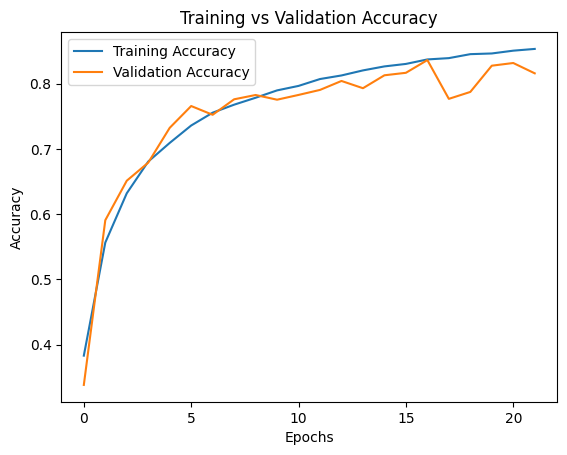

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


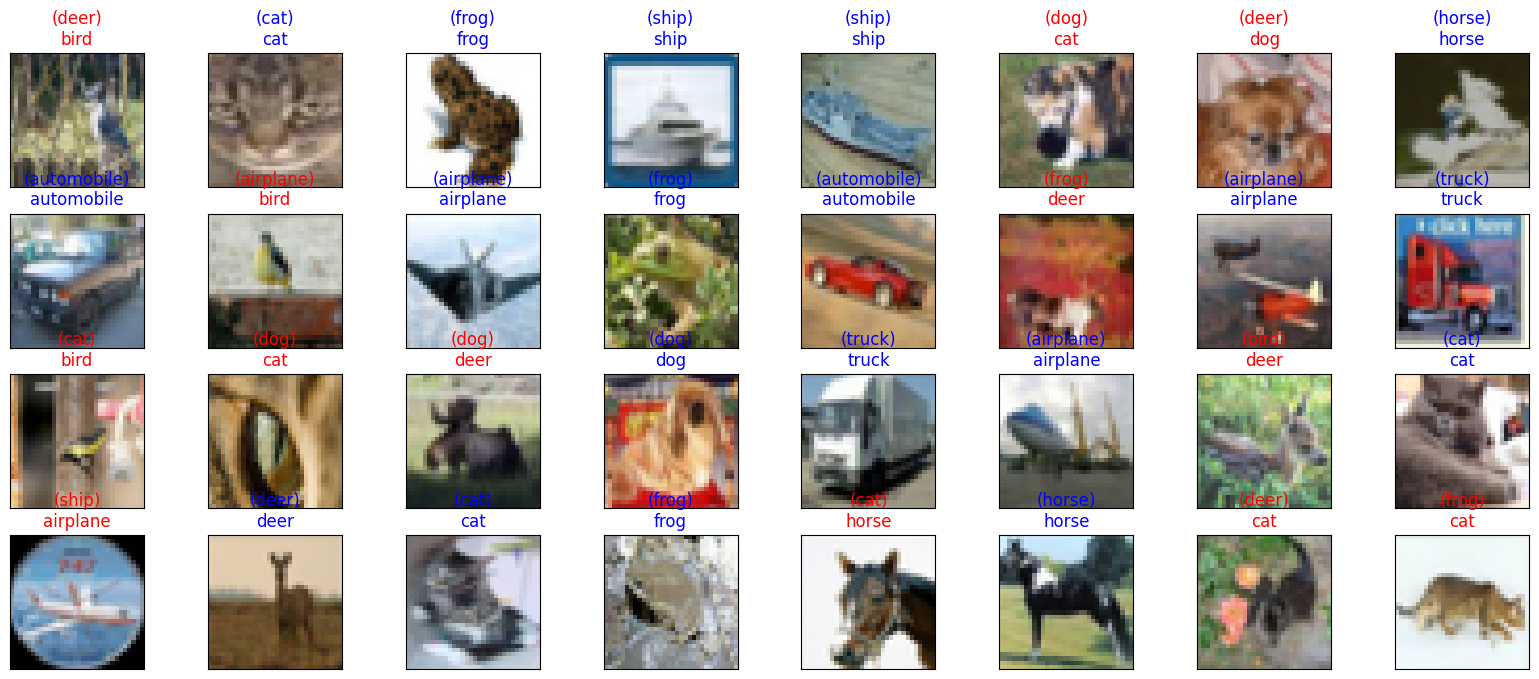

In [27]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("({})\n{}".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                   color="blue" if pred_idx == true_idx else "red")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'frog.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
print("Image shape after preprocessing:", img_array.shape)

Image shape after preprocessing: (1, 32, 32, 3)


In [ ]:

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_label = cifar10_labels[predicted_class_index]
print("The predicted class for the image is:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class for the image is: frog
